## Homework #10 - Missing Values Imputation

### Overview:
As you learned from the last topic, data rarely comes in a structured way
with all values filled. Usually, the data comes with missing values along
the way, which you need to handle, and this is what you will do in this
homework.

### Task:
For this chapter, you will have to do the following:
* Let’s begin by importing the Data Set.
* Create a (bar) plot showing the number of missing values in every
column.
* Split the Data Set into the train and test sets.
* Create an instance of the SimpleImputer with the strategy set as
mean. (https://bit.ly/3Wh7tvN)
* Create an instance of the SimpleImputer with the strategy set as
**`median`**.
* Create an instance of the SimpleImputer with the strategy set as
**`most_frequent`**.
* Create an instance of the SimpleImputer with the strategy set as
**`constant`** and the **`fill_value=0`**.
* Create an instance of the CDI from reparo.
* Create an instance of the FRNNI from reparo.
* Create an instance of the HotDeckImputation from reparo.
* Create an instance of the KNNImputer from reparo.
* Create an instance of the PMM from reparo.
* Create an instance of the SICE from reparo.
* Create an instance of the MICE from reparo.
* Train every imputer on the train Data Set.
* Fill in the missing values on the train and test subset.
* Train the following models on every set that you got after imputing
the missing values:
  * Logistic Regression.
  * Gaussian Naive Bayes.
  * TreeDecisionClassifier.
  * RandomForest.
* Test each of the models on the test set and build the following table:


<div align="center">

| **Imputation Algorithms** | **Prediction algorithms** | **Accuracy** |
|:-------------------------:|:-------------------------:|:------------:|
|                           |                           |              |
|                           |                           |              |

</div>

* Conclude the results you got.


#### MCAR - Missing Completely at Random
Here, every variable and observation holds an equal likelihood of being absent. Picture a child playing with multi-colored Lego blocks to construct a building. Each block symbolizes distinct data elements, such as shape and hue.

During the play, the child might misplace some blocks. These misplaced blocks equate to absent data, akin to the child's inability to recall the specifics of the lost Lego. This lapse occurs without any pattern, leaving the rest of the data unaffected.

#### MAR - Missing at Random
In the MAR scenario, the chances of a data point going missing hinge on the values of that specific variable or other associated variables in the dataset. This indicates a varied likelihood of data absence across observations and variables.

For instance, in a data community survey, those data scientists who aren't proactive about learning might be unaware of the latest algorithms or tools. Consequently, they might sidestep certain questions. The absence of their responses correlates with their learning habits.

#### MNAR- Missing Not at Random
MNAR stands out as the most challenging type of absent data. It comes into play when the other two categories (MCAR and MAR) don't.

Under MNAR, different values within the same variable possess distinct probabilities of going missing, and the underlying reasons might remain elusive.

Take, for instance, a survey centered on marital relationships. Couples in strained relationships might be reticent about answering specific questions, possibly due to discomfort or embarrassment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer, PMM, SICE, MICE
from sklearn.base import RegressorMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVC, LinearSVR
from sklearn.tree import DecisionTreeRegressor

Next, I will import the dataset.

In [2]:
housing_dataset: pd.DataFrame = pd.read_csv("dataset/HousingData.csv")
housing_dataset.head(n=20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
housing_dataset.tail(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


I found the sum of all null values in each column.

In [5]:
null_counters: pd.Series = housing_dataset.isnull().sum()
print(null_counters)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Next, I will plot those values using Bar Plot, as requested in the guide.

In [6]:
null_df = pd.DataFrame(data=null_counters)
null_df

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [7]:
null_df.reset_index(inplace=True)
null_df.columns = ['Feature', 'Missing Values']
null_df

,Feature,Missing Values
0,CRIM,20
1,ZN,20
2,INDUS,20
3,CHAS,20
4,NOX,0
5,RM,0
6,AGE,20
7,DIS,0
8,RAD,0
9,TAX,0


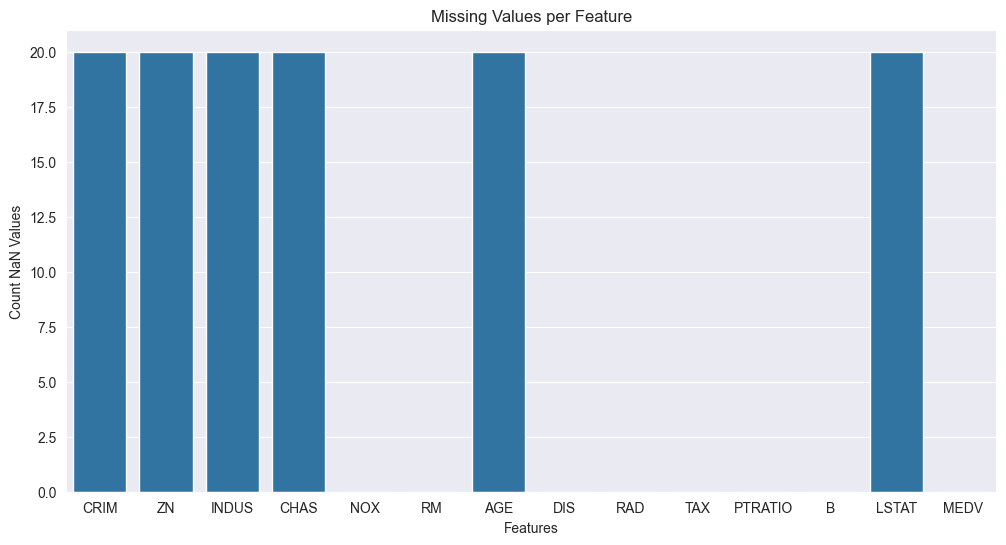

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Missing Values', data=null_df)
plt.xlabel('Features')
plt.ylabel('Count NaN Values')
plt.title('Missing Values per Feature')
plt.show()

As it may be seen, there are 6 out of 14 columns that have Null Values. All of them have 20 NaN values, that I will impute using various described in guidelines methods.

First, I had to split the dataset into training and test sets. I did the split based on Features - Target columns and split based on training - test sets altogether. In the context of this dataset, the target variable may be columns:
* `NOX` - Nitrous Oxide Level,
* `MEDV` - Price of the house, which is determined as median value, that may be predicted.

I decided to work with the price of the house, therefore for Features, I drop `MEDV` column, and take it for the target column.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(housing_dataset.drop(labels=['MEDV'], axis=1), housing_dataset['MEDV'], test_size=.2, random_state=42)

In [10]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,NaN,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,NaN,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [11]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,NaN,0.0,0.510,6.416,NaN,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [12]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [13]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

Next, I had to instantiate various Imputers, as mentioned in the task assignment.

In [14]:
imputers_list: list = [
    SimpleImputer(strategy='mean'),
    SimpleImputer(strategy='median'),
    SimpleImputer(strategy='most_frequent'),
    SimpleImputer(strategy='constant', fill_value=0),
    CDI(),
    FRNNI(),
    HotDeckImputation(),
    KNNImputer(),
    PMM(),
    SICE(),
    MICE()
]
imputers_list

[SimpleImputer(),
 SimpleImputer(strategy='median'),
 SimpleImputer(strategy='most_frequent'),
 SimpleImputer(fill_value=0, strategy='constant'),
 CDI(),
 FRNNI(),
 HotDeckImputation(),
 KNNImputer(),
 PMM(),
 SICE(),
 MICE()]

Also, I instantiated various models as requested in the assignment. Since the target variable is a numerical data type, I replaced `LogisticRegression` with `LinearRegression`, `DecisionTreeClassifier` with `DecisionTreeRegressor`, `RandomForestClassifier` with `RandomForestRegressor` and `GaussianNB` (Gaussian Naive Bayes Model) with `SVR` (Support Vector Machine Model).

In [15]:
models_dict: dict[str, RegressorMixin] = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}
models_dict

{'Linear Regression': LinearRegression(),
 'SVM': SVR(),
 'Decision Tree Regressor': DecisionTreeRegressor(),
 'Random Forest Regressor': RandomForestRegressor()}

Next, I created the table that will be used to store the results of the experiments.

In [16]:
results_table: pd.DataFrame = pd.DataFrame(columns=['Imputation Algorithms',
                                                    'Prediction Algorithms',
                                                    'Accuracy'])
results_table

,Imputation Algorithms,Prediction Algorithms,Accuracy


Next, I had to train all the imputers on the training Data Sets and perform the imputation of the Missing Values using their methods on both training and test subsets. Since all the
imputers adhere to common convention (have `fit()`, `transform()` and `fit_transform()`), I decided to just iterate over all of them and call their methods.

In [17]:
for idx, imputer in enumerate(imputers_list):
    X_train_numpy = X_train.to_numpy()
    X_train_numpy_imp = imputer.fit_transform(X=X_train_numpy)
    X_train_imp = pd.DataFrame(data=X_train_numpy_imp,
                               columns=X_train.columns,
                               index=X_train.index)

    X_test_numpy = X_test.to_numpy()
    X_test_numpy_imp = imputer.transform(X=X_test_numpy)
    X_test_imp = pd.DataFrame(data=X_test_numpy_imp,
                              columns=X_test.columns,
                              index=X_test.index)
    for model_name, model in models_dict.items():
        if model_name == 'SVM':
            scaler = StandardScaler()
            X_train_imp = scaler.fit_transform(X=X_train_imp)
            X_test_imp = scaler.transform(X=X_test_imp)
        model.fit(X=X_train_imp, y=y_train)
        y_hat = model.predict(X=X_test_imp)
        accuracy = model.score(X=X_test_imp, y=y_test)

        results_table = pd.concat([results_table, pd.DataFrame([[imputer, model_name, accuracy]], columns=results_table.columns)], ignore_index=True)

    del X_train_numpy, X_train_numpy_imp, X_train_imp, X_test_numpy, X_test_numpy_imp, X_test_imp, model, y_hat, accuracy

C:\Users\user\AppData\Local\Temp\ipykernel_16884\4267964050.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, pd.DataFrame([[imputer, model_name, accuracy]], columns=results_table.columns)], ignore_index=True)
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\reparo\MICE.py:56: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example 

In [18]:
results_table.sort_values(by=['Accuracy'], inplace=True, ignore_index=True, ascending=False)
results_table

,Imputation Algorithms,Prediction Algorithms,Accuracy
0,PMM(),Random Forest Regressor,0.898025
1,MICE(),Random Forest Regressor,0.896917
2,KNNImputer(),Random Forest Regressor,0.891883
3,KNNImputer(),Decision Tree Regressor,0.888983
4,SimpleImputer(strategy='median'),Random Forest Regressor,0.888697
5,SICE(),Random Forest Regressor,0.887901
6,SimpleImputer(strategy='most_frequent'),Random Forest Regressor,0.884510
7,FRNNI(),Random Forest Regressor,0.877670
8,CDI(),Random Forest Regressor,0.876942
9,SimpleImputer(),Random Forest Regressor,0.874587


As it may be seen, on Boston Housing Price Dataset, greater accuracy displayed Random Forest Regressor Model and Decision Tree Regressor Model, while the worst performance had mainly
Support Vector Machine Model and Linear Regression Model.

As for Imputation algorithms, I tried to understand each one of them in order to understand better the results of the accuracy scores:
* Simple Imputer with Mean - replaces NaN values with the Mean of the column where this NaN values is present, susceptible to outliers, therefore used when the data resembles Normal/
Gaussian Distribution.
* Simple Imputer with Median - replaces NaN values with the Median of the column where this NaN values is present, resistant to outliers, therefore may be used when data is skewed.
* Simple Imputer with Most Frequent Value - replaces NaN values with the Most Frequent Value of the column where this NaN values is present, useful for Categorical Columns.
* Simple Imputer with Constant = 0 - replaces NaN values with the 0. May influence the variance of the column, and has no significant valuable information.

All of the above Imputation Techniques does not take into account the relationships with other columns. More advanced techniques of Imputation, like the ones implemented in `reparo`
library relies on multiple columns from the dataset in order to impute missing data.
* CDI (Cold Deck Imputation) - replaces missing values with a specific selected value from a non-missing cluster of neighbors in the same feature/column. By default, in `reparo`, it will select the first value from the neighbors array.
* HDI (Hot Deck Imputation) - replaces missing values with a randomly selected value from a non-missing cluster of neighbors in the same feature/column.
* KNNI (K-Nearest Neighbor Imputation) - finds the neighbors of the missing value, sort them by their distance and imputes it with the weighted average of the those neighbors based on
their distance, which becomes the weight $\left( weights=\frac{1}{distances} \right)$
* FRNNI (Fuzzy-Rough Nearest Neighbor algorithm) - computes the K-Nearest Neighbors for the missing values in the dataset, finds an approximation of the missing value and then calculates Lower and Upper Approximation of that value, in other words, computes the membership of that value in the cluster of neighbors, and finds the best one.
* PMM (Predictive mean matching) - performs Ordinary Least Squares Regression Model fitting, that is used to predict the values of the missing ones, using K-Nearest Neighbors.
* MICE (Multiple Imputation by Chained Equation) - performs Linear Regression for every column with NaN values (using the present values) and predicts the values that should be imputed.
* SICE (Single Center Imputation from Multiple Chained Equation) - is an extension of MICE, for each missing value, performs MICE to find that value, then find Mean value of the found
results of MICE and use the Mean value for the missing values.

PMM and MICE performed the best between all the Imputation Techniques, since they rely on regression model approaches to estimate missing values more effectively, taking in consideration other columns of the dataset. KNN-based and CDI and HDI techniques are also performing quite well, since they use neighbors as data points and computes the distance and finds the most appropriate values for missing ones. Basic imputation techniques performed worse, since they are simple to use, as well as simple in implementation.